In [1]:
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd

In [2]:
def kinetc_fn(t, *k):
    '''
    Given rate constants 'k_1' to 'k_n' at time 't',
    returns A_(n-1)
    '''
    n = len(k) # the number of k(parameters) given in
    A = 1.0
    for j in range(1, n):
        x1 = 0.0
        for i in range(1, n+1):
            x0 = np.prod([k[p-1]-k[i-1] for p in range(1, n+1) if p != i])
            x1 += np.exp(-k[i-1]*t/x0)
        A *= k[j-1]*x1   
    return A

In [3]:
df = pd.read_csv('kinetic_raw.csv')
df

,Time (min),A0,A1,A2,A3,A4,A5,A6
0,0.00,10043.380,0.000,0.000,0.000,0.000,0.000,0.000
1,0.25,4934.811,1222.983,221.920,46.536,60.536,113.364,0.000
2,0.50,3293.933,1933.397,410.941,64.364,90.950,164.192,0.000
3,1.00,1665.397,2432.497,912.548,171.849,127.778,296.263,0.000
4,2.00,441.941,2123.841,1757.841,477.406,244.849,656.941,0.000
5,3.00,135.849,1345.255,2108.598,859.062,513.870,1120.184,79.021
6,4.00,79.192,892.719,1968.719,1056.941,597.991,1499.841,92.435
7,5.00,0.000,408.284,1520.255,1211.355,992.062,2555.497,163.920
8,10.00,0.000,0.000,222.849,608.941,758.598,2464.841,207.577


In [4]:
kinetc_fn(1,2,3,4,5,6)

157229.61502494832

### <span style="color: #f2cf4a; font-family: monospace; font-size: 1em;">1. Solving for k<sub>1</sub>

In [10]:
A0 = df['A0'][:-2] # read only non-zero A0
t = df['Time (min)'][:-2]

k_1 = np.log(A0)/(-t)
k_1

0         -inf
1   -34.016279
2   -16.199675
3    -7.417819
4    -3.045588
5    -1.637181
6    -1.092969
dtype: float64

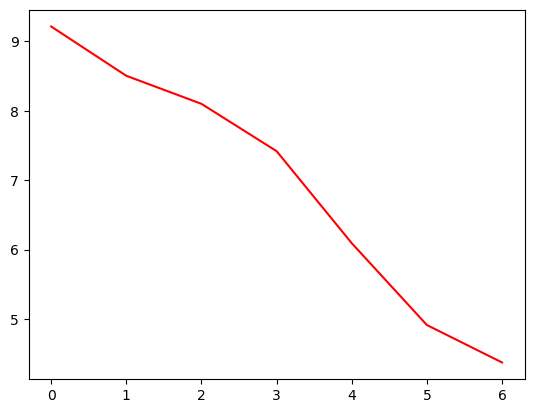

In [14]:
from matplotlib import pyplot as plt

# plt.plot(df['A0'])
plt.plot(np.log(df['A0']),'r')

In [5]:
popt, pcov = curve_fit(kinetc_fn, xdata=, ydata=, p0=None) # if known give P0 (initial guesses)

SyntaxError: invalid syntax (3902311545.py, line 1)